# 0. Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import seaborn as sns

# 1. Đọc dữ liệu từ file CSV

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/20125029/shopeep_koreantop_clothing_shop_data.csv", encoding = "ISO-8859-1")
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

In [4]:
# tách dữ liệu cần thiết
new_df = df.loc[:, ["shopid", "join_year", "response_rate", "rating_good", "response_time", "rating_bad", "rating_star", "is_shopee_verified", "is_official_shop"]]
new_df.head()

,shopid,join_year,response_rate,rating_good,response_time,rating_bad,rating_star,is_shopee_verified,is_official_shop
0,254711738,2020,96,17510,10:13:55,181,4.81,1,0
1,314198143,2020,73,2656,10:43:05,78,4.68,0,0
2,10377223,2016,90,1071829,08:32:07,4647,4.91,1,0
3,21407329,2017,94,18959,09:10:38,44,4.94,1,0
4,11187885,2016,89,39252,11:40:59,680,4.73,1,0


In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shopid              746 non-null    int64  
 1   join_year           746 non-null    int64  
 2   response_rate       746 non-null    int64  
 3   rating_good         746 non-null    int64  
 4   response_time       746 non-null    object 
 5   rating_bad          746 non-null    int64  
 6   rating_star         740 non-null    float64
 7   is_shopee_verified  746 non-null    int64  
 8   is_official_shop    746 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 52.6+ KB


In [6]:
new_df.rating_star.fillna(new_df.rating_star.mean(), inplace = True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shopid              746 non-null    int64  
 1   join_year           746 non-null    int64  
 2   response_rate       746 non-null    int64  
 3   rating_good         746 non-null    int64  
 4   response_time       746 non-null    object 
 5   rating_bad          746 non-null    int64  
 6   rating_star         746 non-null    float64
 7   is_shopee_verified  746 non-null    int64  
 8   is_official_shop    746 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 52.6+ KB


# 2. Xử lý giá trị khuyết thiếu và giá trị ngoại lai

In [7]:
# Chuyển đồi response time sang kiểu giây
new_df.response_time = pd.to_datetime(new_df.response_time, format=' %H:%M:%S')
new_df["total_seconds"] = new_df.response_time.dt.second + new_df.response_time.dt.minute * 60 + new_df.response_time.dt.hour * 3600

In [8]:
new_df.drop("response_time", axis = 1, inplace = True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shopid              746 non-null    int64  
 1   join_year           746 non-null    int64  
 2   response_rate       746 non-null    int64  
 3   rating_good         746 non-null    int64  
 4   rating_bad          746 non-null    int64  
 5   rating_star         746 non-null    float64
 6   is_shopee_verified  746 non-null    int64  
 7   is_official_shop    746 non-null    int64  
 8   total_seconds       746 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 52.6 KB


<AxesSubplot:xlabel='response_rate'>

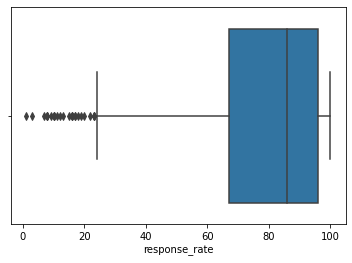

In [12]:
# Vẽ biểu đồ boxplot
sns.boxplot(x = "response_rate",data = new_df)

# 3. Vẽ biểu đồ tần số số lượng shop gia nhập theo các năm

In [15]:
# lấy ra dataframe chứa cột shopid và join_year
temp = new_df.loc[:, ["shopid", "join_year"]]

In [16]:
# xoá các shopid trùng nhau
temp.drop_duplicates(subset = ["shopid"], inplace = True)

<AxesSubplot:xlabel='join_year', ylabel='count'>

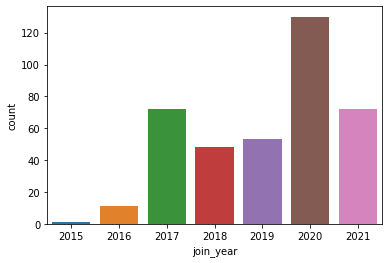

In [17]:
# Biểu đồ countplot
sns.countplot(x = "join_year", data = temp)

# 4. Vẽ biểu đồ xu hướng thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shopid              746 non-null    int64  
 1   join_year           746 non-null    int64  
 2   response_rate       746 non-null    int64  
 3   rating_good         746 non-null    int64  
 4   rating_bad          746 non-null    int64  
 5   rating_star         746 non-null    float64
 6   is_shopee_verified  746 non-null    int64  
 7   is_official_shop    746 non-null    int64  
 8   total_seconds       746 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 52.6 KB


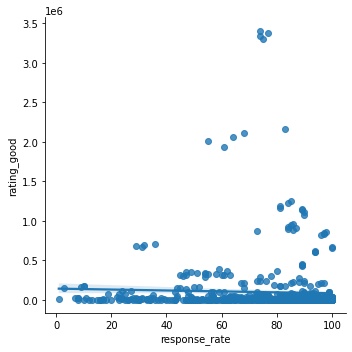

In [19]:
# Biểu đồ xu hướng
sns.lmplot(x = "response_rate", y = "rating_good", data = new_df)

# 5. Vẽ biểu đồ xu hướng thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu

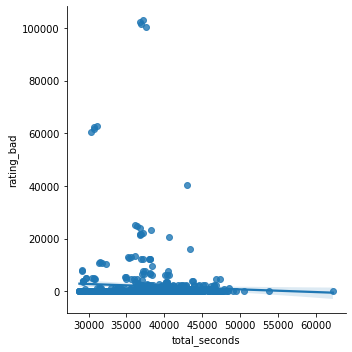

In [20]:
# Biểu đồ xu hướng
sns.lmplot(x = "total_seconds", y = "rating_bad", data = new_df)

# 6. Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình

<AxesSubplot:xlabel='rating_star'>

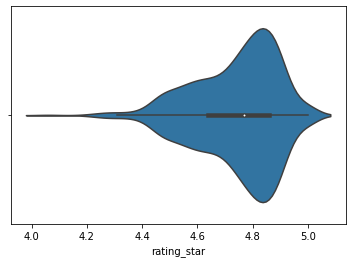

In [21]:
# Biểu đồ phân bố Violin
sns.violinplot(x = "rating_star", data = new_df)

# 7. Vẽ biểu đồ tần số của cửa hàng chính thức và không chính thức

<AxesSubplot:xlabel='is_official_shop', ylabel='count'>

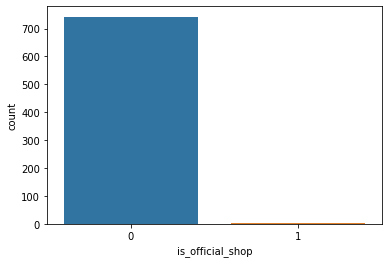

In [22]:
# Biểu đồ tần số của hàng chính thức và không chính thức
sns.countplot(x ="is_official_shop", data = new_df)

# 8. Vẽ biểu đồ tần số của cửa hàng được xác thực với chưa xác thực

<AxesSubplot:xlabel='is_shopee_verified', ylabel='count'>

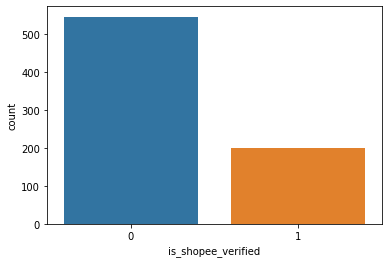

In [23]:
# Biểu đồ tần số của hàng được xác thực với chưa được xác thực
sns.countplot(x ="is_shopee_verified", data = new_df)